In [1]:
# import Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy


In [2]:
# Import Datasets

house_train_csv = pd.read_csv(r'C:\Users\BOTS\Desktop\MachineLearning\SupervisedLearning\Regression\House-Price-Prediction\train.csv')

house_test_csv = pd.read_csv(r'C:\Users\BOTS\Desktop\MachineLearning\SupervisedLearning\Regression\House-Price-Prediction\test.csv')



In [3]:
# Convert Data into a pandas Dataframe

train_df = pd.DataFrame(house_train_csv)
test_df = pd.DataFrame(house_test_csv)

# Identify the structure of the data

train_shape = train_df.shape
test_shape = test_df.shape

print(f'The imported data has the following shape:\n Traning data:{train_shape} \n Test data {test_shape}')


The imported data has the following shape:
 Traning data:(1460, 81) 
 Test data (1459, 80)


In [4]:
train_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [5]:
# Data Cleaning 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Checking for presense of missing values

train_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
# function to handle missing values

def column_clean(df, mode, *columns):
    """
    Handling missing value
    
    Args:
      df (pandas dataframe): Shape (m,n) dataset 
      mode (string): method of cleaning the dataset    
      column (list):  columns with which the data cleaning should be applied     
      
    Returns:
      dataframe (pandas dataframe):  new dataframe
    """  

    col_list= []
    
    for column in columns:
        col_list.append(column)
        
    
    
    if mode == 'Drop column':
        
        df = df.drop(columns=col_list, axis=1)
            
    elif mode == 'Drop Null':
        df = df.dropna(subset=col_list)
            
    elif mode == 'Fill mean':
        df[col].fillna(df[col].mean(), inplace=True)
            
    else:
        for col in columns:
            df[col].fillna(df[col].mode()[0], inplace=True)
            
            
    return df 



In [8]:
train_df1 = column_clean(train_df, 'Drop column', 'Alley','LotFrontage', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature','GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond')

train_df2 = column_clean(train_df1, 'Mode', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2')

train_df3 = column_clean(train_df2, 'Drop Null', 'MasVnrType', 'MasVnrArea', 'BsmtExposure', 'Electrical')

In [9]:
train_df3.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotArea          False
Street           False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 68, dtype: bool

In [10]:
# Exploratory Data Analysis
# Drop unnecessary columns

first_drop = ['LotArea', 'LotShape', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'Electrical','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MasVnrArea', 'LowQualFinSF', 'CentralAir']


train_df4 = train_df3.drop(columns=first_drop)

train_df4.shape


(1413, 48)

In [11]:
train_df4.describe()

,Id,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,MoSold,YrSold,SalePrice
count,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,...,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000
mean,729.492569,56.825902,6.140127,5.595188,1971.450814,1985.204529,454.169144,48.097665,581.788393,1084.055202,...,0.059448,1.560510,0.390658,2.867657,1.036093,6.520170,0.621373,6.326256,2007.810333,182578.849965
std,422.425989,42.305539,1.358077,1.110230,30.372590,20.461355,455.561118,163.754749,438.260298,408.547910,...,0.242459,0.550609,0.505183,0.809055,0.197648,1.617161,0.644455,2.708788,1.327197,79288.325862
min,1.000000,20.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,105.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,2006.000000,34900.000000
25%,364.000000,20.000000,5.000000,5.000000,1954.000000,1968.000000,0.000000,0.000000,247.000000,810.000000,...,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,5.000000,2007.000000,131500.000000
50%,727.000000,50.000000,6.000000,5.000000,1973.000000,1994.000000,399.000000,0.000000,490.000000,1004.000000,...,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,6.000000,2008.000000,164700.000000
75%,1098.000000,70.000000,7.000000,6.000000,2001.000000,2004.000000,720.000000,0.000000,814.000000,1309.000000,...,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,12.000000,2010.000000,755000.000000


In [12]:
numeric_col = ['MSSubClass','OverallQual','OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea','MoSold','YrSold', 'SalePrice']  

numeric_col = train_df4[numeric_col]

numeric_col.shape

(1413, 14)

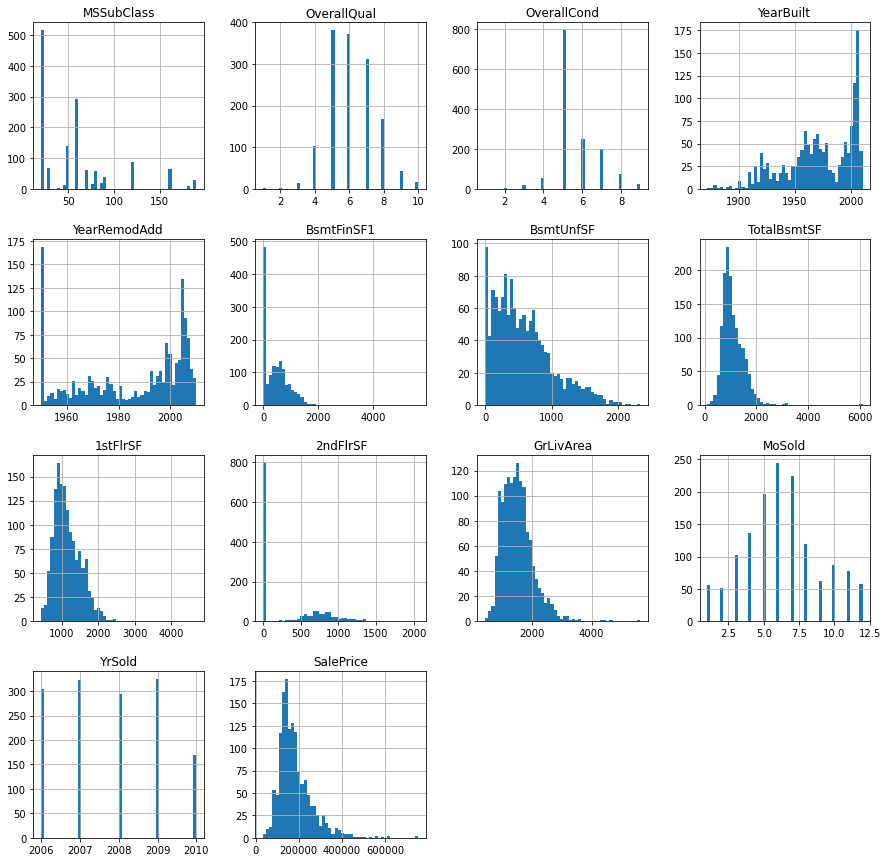

In [13]:
numeric_col.hist(bins=50, figsize=(15,15))
plt.show()

In [14]:
# Checking for correlation between the features to the target value

corr_matrix = numeric_col.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.787027
GrLivArea       0.710844
1stFlrSF        0.615174
TotalBsmtSF     0.609572
YearBuilt       0.519178
YearRemodAdd    0.500659
BsmtFinSF1      0.369685
2ndFlrSF        0.316965
BsmtUnfSF       0.190598
MoSold          0.042932
YrSold         -0.022528
MSSubClass     -0.083001
OverallCond    -0.093989
Name: SalePrice, dtype: float64

In [15]:
# Feature Engineering to improve the correlation between the features

numeric_col1 = numeric_col.copy()

numeric_col1['Engr_OverallYear'] = numeric_col1['YearRemodAdd'] + numeric_col1['YearBuilt']
numeric_col1['Engr_1st&2ndFirSF'] = numeric_col1['1stFlrSF'] + numeric_col1['2ndFlrSF']

corr_matrix_1 = numeric_col1.corr()
corr_matrix_1["SalePrice"].sort_values(ascending=False)




SalePrice            1.000000
OverallQual          0.787027
Engr_1st&2ndFirSF    0.719455
GrLivArea            0.710844
1stFlrSF             0.615174
TotalBsmtSF          0.609572
Engr_OverallYear     0.570542
YearBuilt            0.519178
YearRemodAdd         0.500659
BsmtFinSF1           0.369685
2ndFlrSF             0.316965
BsmtUnfSF            0.190598
MoSold               0.042932
YrSold              -0.022528
MSSubClass          -0.083001
OverallCond         -0.093989
Name: SalePrice, dtype: float64

In [16]:
drop_features = ['YearRemodAdd', 'YearBuilt', '1stFlrSF', '2ndFlrSF']

numeric_col2 = numeric_col1.drop(columns=drop_features)

numeric_col2.shape

(1413, 12)

In [17]:
numeric_col2.head(2)

,MSSubClass,OverallQual,OverallCond,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,GrLivArea,MoSold,YrSold,SalePrice,Engr_OverallYear,Engr_1st&2ndFirSF
0,60,7,5,706,150,856,1710,2,2008,208500,4006,1710
1,20,6,8,978,284,1262,1262,5,2007,181500,3952,1262


In [18]:
numeric_columns = list(numeric_col)

In [19]:
category_columns = train_df4.drop(columns=numeric_columns)

In [20]:
category_columns.shape

(1413, 34)

In [21]:
category_columns.head(2)

,Id,MSZoning,Street,LandContour,Utilities,Neighborhood,BldgType,HouseStyle,Exterior1st,Exterior2nd,...,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,PavedDrive,SaleType,SaleCondition
0,1,RL,Pave,Lvl,AllPub,CollgCr,1Fam,2Story,VinylSd,VinylSd,...,1,3,1,Gd,8,Typ,0,Y,WD,Normal
1,2,RL,Pave,Lvl,AllPub,Veenker,1Fam,1Story,MetalSd,MetalSd,...,0,3,1,TA,6,Typ,1,Y,WD,Normal


In [22]:
category_columns['Engr_bath'] = category_columns['FullBath'] + category_columns['HalfBath']*0.5 + category_columns['BsmtFullBath']


In [23]:
bath = ['FullBath', 'HalfBath', 'BsmtFullBath']

category_columns1 = category_columns.drop(columns=bath)

In [24]:
category_columns1.shape

(1413, 32)

In [25]:
category_columns1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413 entries, 0 to 1459
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1413 non-null   int64  
 1   MSZoning       1413 non-null   object 
 2   Street         1413 non-null   object 
 3   LandContour    1413 non-null   object 
 4   Utilities      1413 non-null   object 
 5   Neighborhood   1413 non-null   object 
 6   BldgType       1413 non-null   object 
 7   HouseStyle     1413 non-null   object 
 8   Exterior1st    1413 non-null   object 
 9   Exterior2nd    1413 non-null   object 
 10  ExterQual      1413 non-null   object 
 11  ExterCond      1413 non-null   object 
 12  Foundation     1413 non-null   object 
 13  BsmtQual       1413 non-null   object 
 14  BsmtCond       1413 non-null   object 
 15  BsmtExposure   1413 non-null   object 
 16  BsmtFinType1   1413 non-null   object 
 17  BsmtFinType2   1413 non-null   object 
 18  BsmtFinS

In [26]:
#def convert_to_cat(df):
    """
     Convert columns datatype to a categorical datatype
    Args:
    df(Pandas Dataframe) : shape(m,n)
    
    Return
    df(Pandas Dataframe)
    """
    
    cols = list(df)
    
    for col in cols:
        df[col] = df[col].astype('category', copy=False)
        
    return df

category_column2 = convert_to_cat(category_columns1)

In [26]:
category_column2 = category_columns1.copy()
category_column2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413 entries, 0 to 1459
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1413 non-null   int64  
 1   MSZoning       1413 non-null   object 
 2   Street         1413 non-null   object 
 3   LandContour    1413 non-null   object 
 4   Utilities      1413 non-null   object 
 5   Neighborhood   1413 non-null   object 
 6   BldgType       1413 non-null   object 
 7   HouseStyle     1413 non-null   object 
 8   Exterior1st    1413 non-null   object 
 9   Exterior2nd    1413 non-null   object 
 10  ExterQual      1413 non-null   object 
 11  ExterCond      1413 non-null   object 
 12  Foundation     1413 non-null   object 
 13  BsmtQual       1413 non-null   object 
 14  BsmtCond       1413 non-null   object 
 15  BsmtExposure   1413 non-null   object 
 16  BsmtFinType1   1413 non-null   object 
 17  BsmtFinType2   1413 non-null   object 
 18  BsmtFinS

In [27]:
# Exploring values in each categorical columns

category_column2['MSZoning'].unique()
category_column2['MSZoning'].value_counts()

RL         1112
RM          214
FV           62
RH           15
C (all)      10
Name: MSZoning, dtype: int64

In [28]:
category_column2['Street'].unique()
category_column2['Street'].value_counts()

Pave    1407
Grvl       6
Name: Street, dtype: int64

In [29]:
category_column2['LandContour'].unique()
category_column2['LandContour'].value_counts()


Lvl    1268
Bnk      61
HLS      50
Low      34
Name: LandContour, dtype: int64

In [30]:
category_column2['Utilities'].unique()
category_column2['Utilities'].value_counts()

AllPub    1412
NoSeWa       1
Name: Utilities, dtype: int64

In [31]:
category_column2['Neighborhood'].unique()
#category_column2['Neighborhood'].value_counts()


array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Timber', 'Gilbert', 'StoneBr',
       'ClearCr', 'Edwards', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [32]:
category_column2['BldgType'].unique()
category_column2['BldgType'].value_counts()

# Map categorical features to a numeric class

bldgType_map = {'1Fam': 1, 
               '2fmCon':2, 
               'TwnhsE': 4, 
               'Duplex': 3, 
               'Twnhs':5
               }

category_column2['BldgType_MAP'] = category_column2['BldgType'].map(bldgType_map)


In [33]:
category_column2['HouseStyle'].unique()

#category_column2['HouseStyle'].value_counts()
housestyle_map = {'2Story':4,
                 '1Story':1, 
                 '1.5Fin': 3,
                 '1.5Unf': 2, 
                 '2.5Fin': 6,
                 '2.5Unf':5,
                 'SFoyer':7,
                 'SLvl':8}

category_column2['housestyle_MAP'] = category_column2['HouseStyle'].map(housestyle_map)


In [34]:
#category_column2['Exterior1st'].unique()
#category_column2['Exterior1st'].value_counts()


In [35]:
#category_column2['Exterior2nd'].unique()
#category_column2['Exterior2nd'].value_counts()


In [36]:
category_column2['ExterQual'].unique()
category_column2['ExterQual'].value_counts()

exterqual_map = {'Ex':5,
                'Gd':4,
                'TA':3,
                'Fa':2}

category_column2['ExterQual_map'] = category_column2['ExterQual'].map(exterqual_map)


In [37]:
category_column2['ExterCond'].unique()
category_column2['ExterCond'].value_counts()


TA    1240
Gd     145
Fa      24
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [38]:
category_column2['Foundation'].unique()
category_column2['Foundation'].value_counts()

PConc     634
CBlock    625
BrkTil    145
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [39]:
category_column2['BsmtQual'].unique()
category_column2['BsmtQual'].value_counts()

bsmtqual_map = {'Ex':5,
               'Gd':4,
               'TA':3,
               'Fa':2}

category_column2['BsmtQual_map'] = category_column2['BsmtQual'].map(bsmtqual_map)

In [40]:
category_column2['BsmtCond'].unique()
category_column2['BsmtCond'].value_counts()

TA    1302
Gd      64
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [41]:
category_column2['BsmtExposure'].unique()
category_column2['BsmtExposure'].value_counts()

bsmtexposure_map = {'Gd':4,
                   'Av':3,
                   'Mn':2,
                   'No':1}

category_column2['BsmtExposure_map'] = category_column2['BsmtExposure'].map(bsmtexposure_map)

In [42]:
category_column2['BsmtFinType1'].unique()
category_column2['BsmtFinType1'].value_counts()

bsmtfintype1_map = {'GLQ':6,
                   'ALQ':5,
                   'BLQ':4,
                   'Rec':3,
                   'LwQ':2,
                   'Unf':1
                   }

category_column2['BsmtFinType1_map'] = category_column2['BsmtFinType1'].map(bsmtfintype1_map)

In [43]:
category_column2['BsmtFinType2'].unique()
category_column2['BsmtFinType2'].value_counts()

Unf    1247
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [44]:
category_column2['BsmtFinSF2'].value_counts()

0       1246
180        5
374        3
551        2
147        2
        ... 
532        1
165        1
1120       1
311        1
1029       1
Name: BsmtFinSF2, Length: 144, dtype: int64

In [45]:
category_column2['Heating'].value_counts()

GasA    1387
GasW      17
Grav       7
OthW       2
Name: Heating, dtype: int64

In [46]:
category_column2['HeatingQC'].value_counts()

heatingqc_map = {'Ex':5,
                'Gd':4,
                'TA':3,
                'Fa':2,
                'Po':1}

category_column2['HeatingQC_map'] = category_column2['HeatingQC'].map(heatingqc_map)


In [47]:
category_column2['BsmtHalfBath'].value_counts()


0    1331
1      80
2       2
Name: BsmtHalfBath, dtype: int64

In [48]:

category_column2['KitchenQual'].value_counts()

kitchenqual_map = {'Ex':5,
                  'Gd':4,
                  'TA':3,
                  'Fa':2}

category_column2['KitchenQual_map'] = category_column2['KitchenQual'].map(kitchenqual_map)

In [49]:

category_column2['TotRmsAbvGrd'].value_counts()

6     393
7     317
5     268
8     180
4      92
9      72
10     46
11     18
3      16
12     10
14      1
Name: TotRmsAbvGrd, dtype: int64

In [50]:
category_column2['Functional'].value_counts()

functional_map = {'Typ':7,
                 'Min1':6,
                 'Min2':5,
                 'Mod':4,
                 'Maj1':3,
                 'Maj2':2,
                 'Sev':1}

category_column2['Functional_map'] = category_column2['Functional'].map(functional_map)


In [51]:
category_column2['Fireplaces'].value_counts()


0    657
1    639
2    112
3      5
Name: Fireplaces, dtype: int64

In [52]:
category_column2['PavedDrive'].value_counts()


Y    1304
N      80
P      29
Name: PavedDrive, dtype: int64

In [53]:
category_column2['SaleType'].value_counts()


WD       1225
New       119
COD        42
ConLD       8
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [54]:
category_column2['SaleCondition'].value_counts()


Normal     1160
Partial     122
Abnorml     100
Family       20
Alloca        8
AdjLand       3
Name: SaleCondition, dtype: int64

In [55]:
category_column2['Engr_bath'].value_counts()

2.0    448
2.5    273
1.0    243
3.0    181
3.5    138
1.5    111
4.0     11
4.5      6
6.0      1
5.0      1
Name: Engr_bath, dtype: int64

In [56]:

#===============================================================================================================================

# ----------- Street ==> Not a good feature to use for prediction, having class imbalance of 1407 to 6.(Drop column)

# ----------- LandContour ==>  Not a good feature to use for prediction, having class imbalance.(Drop column)

# ----------- Utilities ==>  Not a good feature to use for prediction, having class imbalance.(Drop column)

# ---------- ExterCond ==> Not a good feature to use for prediction, having class imbalance.(Drop column)

# ------- BsmtCond ==> Not a good feature to use for prediction, having class imbalance.(Drop column)

# ------- BsmtFinType2 ==> Not a good feature to use for prediction, having class imbalance.(Drop column)

# ------- Heating ==> Not a good feature to use for prediction, having class imbalance.(Drop column)

# ------- BsmtHalfBath ==> Not a good feature to use for prediction, having class imbalance.(Drop column)

# ------ KitchenAbvGr ==> Not a good feature to use for prediction, having class imbalance.(Drop column)

# ----- PavedDrive ==> Not a good feature to use for prediction, having class imbalance.(Drop column)


# ==============================================================================================================================


# ----------- Neighborhood ==> Good distribution of class,     (GOOD FOR MODEL TRAINING) --- ONEHOT ENCODING 2ND STAGE 

# ---------- Exterior1st ==> Good distribution of class,     (GOOD FOR MODEL TRAINING) ONEHOT ENCODING 2ND STAGE

# ---------- Exterior2nd ==> Good distribution of class,     (GOOD FOR MODEL TRAINING) ONEHOT ENCODING 2ND STAGE 

# --------- Foundation ==> Good distribution of class,     (GOOD FOR MODEL TRAINING) ONEHOT ENCODING 2ND STAGE

# ----- SaleType ==> Good distribution of class,     (GOOD FOR MODEL TRAINING) ONEHOT ENCODING 2ND STAGE

# ------ SaleCondition ==> Good distribution of class,     (GOOD FOR MODEL TRAINING) ONEHOT ENCODING 2ND STAGE

# ----------- MS-Zoning ==> Let the model decide 


# ==============================================================================================================================


# ---------- BldgType ==> Bad class representation but an important feature to use for prediction, having class imbalance.(Manual mapping)

# ---------- HouseStyle ==> Good distribution of class,     (GOOD FOR MODEL TRAINING) (Manual mapping)

# ---------- ExterQual ==> Good distribution of class,     (GOOD FOR MODEL TRAINING) (Manual mapping)
 
# --------- BsmtQual ==> Good distribution of class,     (GOOD FOR MODEL TRAINING) (Manual mapping)

# ------- BsmtExposure ==> Good distribution of class,     (GOOD FOR MODEL TRAINING) (Manual mapping)

# ------- BsmtFinType1 ==> Good distribution of class,     (GOOD FOR MODEL TRAINING) (Manual mapping)


# ------- HeatingQC ==> Good distribution of class,     (GOOD FOR MODEL TRAINING) (Manual mapping)

# ------- BedroomAbvGr ==> Good distribution of class, ALREADY DISTRIBUTED

# ----- KitchenQual ==> Good distribution of class,     (GOOD FOR MODEL TRAINING) (Manual mapping)


# ==========================================================================================================================

# ------- BsmtFinSF2 ************ ***************** ****************** ************************

# ----- TotRmsAbvGrd ==> Good distribution of class, ALREADY DISTRIBUTED

# ----- Functional ==> * Underpresented but would be checked again.

# ----- Fireplaces ==> Good distribution of class, ALREADY DISTRIBUTED

# ------ Engr_bath ==> Good distribution of class, ALREADY DISTRIBUTED


In [57]:
category_column2.shape

(1413, 41)

In [58]:
category_column2.head(2)

,Id,MSZoning,Street,LandContour,Utilities,Neighborhood,BldgType,HouseStyle,Exterior1st,Exterior2nd,...,Engr_bath,BldgType_MAP,housestyle_MAP,ExterQual_map,BsmtQual_map,BsmtExposure_map,BsmtFinType1_map,HeatingQC_map,KitchenQual_map,Functional_map
0,1,RL,Pave,Lvl,AllPub,CollgCr,1Fam,2Story,VinylSd,VinylSd,...,3.5,1,4,4,4,1,6,5,4,7
1,2,RL,Pave,Lvl,AllPub,Veenker,1Fam,1Story,MetalSd,MetalSd,...,2.0,1,1,3,4,4,5,5,3,7


In [59]:
second_drop = ['Street','LandContour', 'Utilities', 'ExterCond','BsmtCond', 'BsmtFinType2', 'Heating', 'BsmtHalfBath', 'KitchenAbvGr', 'PavedDrive'] 

In [60]:
category_column3 = category_column2.drop(columns=second_drop)

In [61]:
category_column3.shape

(1413, 31)

In [62]:
list(category_column3)

['Id',
 'MSZoning',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF2',
 'HeatingQC',
 'BedroomAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'SaleType',
 'SaleCondition',
 'Engr_bath',
 'BldgType_MAP',
 'housestyle_MAP',
 'ExterQual_map',
 'BsmtQual_map',
 'BsmtExposure_map',
 'BsmtFinType1_map',
 'HeatingQC_map',
 'KitchenQual_map',
 'Functional_map']

In [63]:
unmapped_cat = ['BldgType', 'HouseStyle', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC',  'KitchenQual']

category_column4 = category_column3.drop(columns=unmapped_cat)

In [64]:
category_column4.shape

(1413, 23)

In [65]:
collide_df = pd.concat([numeric_col2, category_column4], axis=1)

In [66]:
collide_df.shape

(1413, 35)

In [67]:
collide_df.head(2)

,MSSubClass,OverallQual,OverallCond,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,GrLivArea,MoSold,YrSold,SalePrice,...,Engr_bath,BldgType_MAP,housestyle_MAP,ExterQual_map,BsmtQual_map,BsmtExposure_map,BsmtFinType1_map,HeatingQC_map,KitchenQual_map,Functional_map
0,60,7,5,706,150,856,1710,2,2008,208500,...,3.5,1,4,4,4,1,6,5,4,7
1,20,6,8,978,284,1262,1262,5,2007,181500,...,2.0,1,1,3,4,4,5,5,3,7


In [68]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
collide_df.head(5)

,MSSubClass,OverallQual,OverallCond,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,GrLivArea,MoSold,YrSold,SalePrice,Engr_OverallYear,Engr_1st&2ndFirSF,Id,MSZoning,Neighborhood,Exterior1st,Exterior2nd,Foundation,BsmtFinSF2,BedroomAbvGr,TotRmsAbvGrd,Functional,Fireplaces,SaleType,SaleCondition,Engr_bath,BldgType_MAP,housestyle_MAP,ExterQual_map,BsmtQual_map,BsmtExposure_map,BsmtFinType1_map,HeatingQC_map,KitchenQual_map,Functional_map
0,60,7,5,706,150,856,1710,2,2008,208500,4006,1710,1,RL,CollgCr,VinylSd,VinylSd,PConc,0,3,8,Typ,0,WD,Normal,3.5,1,4,4,4,1,6,5,4,7
1,20,6,8,978,284,1262,1262,5,2007,181500,3952,1262,2,RL,Veenker,MetalSd,MetalSd,CBlock,0,3,6,Typ,1,WD,Normal,2.0,1,1,3,4,4,5,5,3,7
2,60,7,5,486,434,920,1786,9,2008,223500,4003,1786,3,RL,CollgCr,VinylSd,VinylSd,PConc,0,3,6,Typ,1,WD,Normal,3.5,1,4,4,4,2,6,5,4,7
3,70,7,5,216,540,756,1717,2,2006,140000,3885,1717,4,RL,Crawfor,Wd Sdng,Wd Shng,BrkTil,0,3,7,Typ,1,WD,Abnorml,2.0,1,4,3,3,1,5,4,4,7
4,60,8,5,655,490,1145,2198,12,2008,250000,4000,2198,5,RL,NoRidge,VinylSd,VinylSd,PConc,0,4,9,Typ,1,WD,Normal,3.5,1,4,4,4,3,6,5,4,7


In [69]:
corr2 = collide_df.corr()

corr2['SalePrice'].sort_values(ascending=False)

SalePrice            1.000000
OverallQual          0.787027
Engr_1st&2ndFirSF    0.719455
GrLivArea            0.710844
ExterQual_map        0.675975
KitchenQual_map      0.654230
BsmtQual_map         0.643153
Engr_bath            0.624160
TotalBsmtSF          0.609572
Engr_OverallYear     0.570542
TotRmsAbvGrd         0.545475
Fireplaces           0.463145
HeatingQC_map        0.418950
BsmtFinSF1           0.369685
BsmtExposure_map     0.350848
BsmtFinType1_map     0.276317
BsmtUnfSF            0.190598
BedroomAbvGr         0.170222
Functional_map       0.100301
MoSold               0.042932
housestyle_MAP       0.033272
BsmtFinSF2          -0.017750
YrSold              -0.022528
Id                  -0.025480
MSSubClass          -0.083001
OverallCond         -0.093989
BldgType_MAP        -0.106439
Name: SalePrice, dtype: float64

In [70]:
X_train = collide_df.drop(columns='SalePrice')

y_train = collide_df['SalePrice']

In [100]:
X_train.head()

,MSSubClass,OverallQual,OverallCond,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,GrLivArea,MoSold,YrSold,Engr_OverallYear,Engr_1st&2ndFirSF,Id,MSZoning,Neighborhood,Exterior1st,Exterior2nd,Foundation,BsmtFinSF2,BedroomAbvGr,TotRmsAbvGrd,Functional,Fireplaces,SaleType,SaleCondition,Engr_bath,BldgType_MAP,housestyle_MAP,ExterQual_map,BsmtQual_map,BsmtExposure_map,BsmtFinType1_map,HeatingQC_map,KitchenQual_map,Functional_map
0,60,7,5,706,150,856,1710,2,2008,4006,1710,1,3,CollgCr,VinylSd,VinylSd,PConc,0,3,8,Typ,0,WD,Normal,3.5,1,4,4,4,1,6,5,4,7
1,20,6,8,978,284,1262,1262,5,2007,3952,1262,2,3,Veenker,MetalSd,MetalSd,CBlock,0,3,6,Typ,1,WD,Normal,2.0,1,1,3,4,4,5,5,3,7
2,60,7,5,486,434,920,1786,9,2008,4003,1786,3,3,CollgCr,VinylSd,VinylSd,PConc,0,3,6,Typ,1,WD,Normal,3.5,1,4,4,4,2,6,5,4,7
3,70,7,5,216,540,756,1717,2,2006,3885,1717,4,3,Crawfor,Wd Sdng,Wd Shng,BrkTil,0,3,7,Typ,1,WD,Abnorml,2.0,1,4,3,3,1,5,4,4,7
4,60,8,5,655,490,1145,2198,12,2008,4000,2198,5,3,NoRidge,VinylSd,VinylSd,PConc,0,4,9,Typ,1,WD,Normal,3.5,1,4,4,4,3,6,5,4,7


In [ ]:
MSZoning, Neighborhood, Exterior1st, Exterior2nd, Foundation, Functional, SaleType, SaleCondition

In [72]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder



le = LabelEncoder()

label_MSZoning = le.fit(X_train['MSZoning'])



In [73]:

X_train['MSZoning'] = label_MSZoning.transform(X_train['MSZoning'])

In [74]:
label_MSZoning.classes_

array(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype=object)

In [75]:
label_MSZoning

#X_train['MSZoning'] = label_MSZoning.transform(X_train['MSZoning'])


X_train.head()

,MSSubClass,OverallQual,OverallCond,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,GrLivArea,MoSold,YrSold,Engr_OverallYear,Engr_1st&2ndFirSF,Id,MSZoning,Neighborhood,Exterior1st,Exterior2nd,Foundation,BsmtFinSF2,BedroomAbvGr,TotRmsAbvGrd,Functional,Fireplaces,SaleType,SaleCondition,Engr_bath,BldgType_MAP,housestyle_MAP,ExterQual_map,BsmtQual_map,BsmtExposure_map,BsmtFinType1_map,HeatingQC_map,KitchenQual_map,Functional_map
0,60,7,5,706,150,856,1710,2,2008,4006,1710,1,3,CollgCr,VinylSd,VinylSd,PConc,0,3,8,Typ,0,WD,Normal,3.5,1,4,4,4,1,6,5,4,7
1,20,6,8,978,284,1262,1262,5,2007,3952,1262,2,3,Veenker,MetalSd,MetalSd,CBlock,0,3,6,Typ,1,WD,Normal,2.0,1,1,3,4,4,5,5,3,7
2,60,7,5,486,434,920,1786,9,2008,4003,1786,3,3,CollgCr,VinylSd,VinylSd,PConc,0,3,6,Typ,1,WD,Normal,3.5,1,4,4,4,2,6,5,4,7
3,70,7,5,216,540,756,1717,2,2006,3885,1717,4,3,Crawfor,Wd Sdng,Wd Shng,BrkTil,0,3,7,Typ,1,WD,Abnorml,2.0,1,4,3,3,1,5,4,4,7
4,60,8,5,655,490,1145,2198,12,2008,4000,2198,5,3,NoRidge,VinylSd,VinylSd,PConc,0,4,9,Typ,1,WD,Normal,3.5,1,4,4,4,3,6,5,4,7


In [76]:
ohe = OneHotEncoder()

one_hot_neighbor = ohe.fit_transform(X_train[['Neighborhood']]).toarray()

In [77]:
X_train.head()

,MSSubClass,OverallQual,OverallCond,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,GrLivArea,MoSold,YrSold,Engr_OverallYear,Engr_1st&2ndFirSF,Id,MSZoning,Neighborhood,Exterior1st,Exterior2nd,Foundation,BsmtFinSF2,BedroomAbvGr,TotRmsAbvGrd,Functional,Fireplaces,SaleType,SaleCondition,Engr_bath,BldgType_MAP,housestyle_MAP,ExterQual_map,BsmtQual_map,BsmtExposure_map,BsmtFinType1_map,HeatingQC_map,KitchenQual_map,Functional_map
0,60,7,5,706,150,856,1710,2,2008,4006,1710,1,3,CollgCr,VinylSd,VinylSd,PConc,0,3,8,Typ,0,WD,Normal,3.5,1,4,4,4,1,6,5,4,7
1,20,6,8,978,284,1262,1262,5,2007,3952,1262,2,3,Veenker,MetalSd,MetalSd,CBlock,0,3,6,Typ,1,WD,Normal,2.0,1,1,3,4,4,5,5,3,7
2,60,7,5,486,434,920,1786,9,2008,4003,1786,3,3,CollgCr,VinylSd,VinylSd,PConc,0,3,6,Typ,1,WD,Normal,3.5,1,4,4,4,2,6,5,4,7
3,70,7,5,216,540,756,1717,2,2006,3885,1717,4,3,Crawfor,Wd Sdng,Wd Shng,BrkTil,0,3,7,Typ,1,WD,Abnorml,2.0,1,4,3,3,1,5,4,4,7
4,60,8,5,655,490,1145,2198,12,2008,4000,2198,5,3,NoRidge,VinylSd,VinylSd,PConc,0,4,9,Typ,1,WD,Normal,3.5,1,4,4,4,3,6,5,4,7


In [79]:
#X_train['MSZoning']

In [80]:
dummies_Neighborhood = pd.get_dummies(X_train['Neighborhood'], prefix='neighbor')

dummies_Neighborhood.shape

(1413, 25)

In [ ]:
# ---------------- dummies_Neighborhood

# ---------------- dummies_Exterior1st drop Exterior2

# ----------------dummies_Foundation

# -----------------dummies_SaleType

# ---------------- dummies_SaleCondition



In [81]:
dummies_Exterior1st = pd.get_dummies(X_train['Exterior1st'], prefix='Exterior1st')

dummies_Exterior1st.shape

(1413, 14)

In [82]:
dummies_Foundation = pd.get_dummies(X_train['Foundation'], prefix='Foundation')



In [83]:
dummies_Functional = pd.get_dummies(X_train['Functional'], prefix='Functional')
dummies_Functional.shape

(1413, 7)

In [84]:
dummies_SaleType = pd.get_dummies(X_train['SaleType'], prefix='SaleType')

dummies_SaleType.shape

(1413, 9)

In [85]:
dummies_SaleCondition = pd.get_dummies(X_train['SaleCondition'], prefix='SaleCondition')
dummies_SaleCondition.shape

(1413, 6)

In [86]:
X_train_dummies = pd.concat([X_train, dummies_Neighborhood, dummies_Exterior1st, dummies_Foundation, dummies_SaleType, dummies_SaleCondition], axis=1)


In [87]:
X_train_dummies.shape

(1413, 93)

In [89]:
X_train_dummies1 = X_train_dummies.drop(columns=['Exterior2nd'])

X_train_dummies1.head(5)

,MSSubClass,OverallQual,OverallCond,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,GrLivArea,MoSold,YrSold,Engr_OverallYear,Engr_1st&2ndFirSF,Id,MSZoning,Neighborhood,Exterior1st,Foundation,BsmtFinSF2,BedroomAbvGr,TotRmsAbvGrd,Functional,Fireplaces,SaleType,SaleCondition,Engr_bath,BldgType_MAP,housestyle_MAP,ExterQual_map,BsmtQual_map,BsmtExposure_map,BsmtFinType1_map,HeatingQC_map,KitchenQual_map,Functional_map,neighbor_Blmngtn,neighbor_Blueste,neighbor_BrDale,neighbor_BrkSide,neighbor_ClearCr,neighbor_CollgCr,neighbor_Crawfor,neighbor_Edwards,neighbor_Gilbert,neighbor_IDOTRR,neighbor_MeadowV,neighbor_Mitchel,neighbor_NAmes,neighbor_NPkVill,neighbor_NWAmes,neighbor_NoRidge,neighbor_NridgHt,neighbor_OldTown,neighbor_SWISU,neighbor_Sawyer,neighbor_SawyerW,neighbor_Somerst,neighbor_StoneBr,neighbor_Timber,neighbor_Veenker,Exterior1st_AsbShng,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,7,5,706,150,856,1710,2,2008,4006,1710,1,3,CollgCr,VinylSd,PConc,0,3,8,Typ,0,WD,Normal,3.5,1,4,4,4,1,6,5,4,7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,6,8,978,284,1262,1262,5,2007,3952,1262,2,3,Veenker,MetalSd,CBlock,0,3,6,Typ,1,WD,Normal,2.0,1,1,3,4,4,5,5,3,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,60,7,5,486,434,920,1786,9,2008,4003,1786,3,3,CollgCr,VinylSd,PConc,0,3,6,Typ,1,WD,Normal,3.5,1,4,4,4,2,6,5,4,7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,70,7,5,216,540,756,1717,2,2006,3885,1717,4,3,Crawfor,Wd Sdng,BrkTil,0,3,7,Typ,1,WD,Abnorml,2.0,1,4,3,3,1,5,4,4,7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,60,8,5,655,490,1145,2198,12,2008,4000,2198,5,3,NoRidge,VinylSd,PConc,0,4,9,Typ,1,WD,Normal,3.5,1,4,4,4,3,6,5,4,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [95]:
X_train_dummies2 = X_train_dummies1.drop(columns=['Neighborhood','Exterior1st', 'Foundation', 'SaleType', 'SaleCondition', 'Functional'])

X_train_dummies3 = X_train_dummies2.drop(columns=['Functional'])

In [96]:
from sklearn.linear_model import LinearRegression

ls = LinearRegression()

linear_model = ls.fit(X_train_dummies3, y_train)

In [99]:
linear_model.

<bound method RegressorMixin.score of LinearRegression()>